In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return x**2 + 2*x - 1

In [5]:
f(4.0)

23.0

In [6]:
xs = np.arange(-10, 10, 0.5)
ys = f(xs)
xs , ys

(array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
         -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
         -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
          3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
          8. ,   8.5,   9. ,   9.5]),
 array([ 79.  ,  70.25,  62.  ,  54.25,  47.  ,  40.25,  34.  ,  28.25,
         23.  ,  18.25,  14.  ,  10.25,   7.  ,   4.25,   2.  ,   0.25,
         -1.  ,  -1.75,  -2.  ,  -1.75,  -1.  ,   0.25,   2.  ,   4.25,
          7.  ,  10.25,  14.  ,  18.25,  23.  ,  28.25,  34.  ,  40.25,
         47.  ,  54.25,  62.  ,  70.25,  79.  ,  88.25,  98.  , 108.25]))

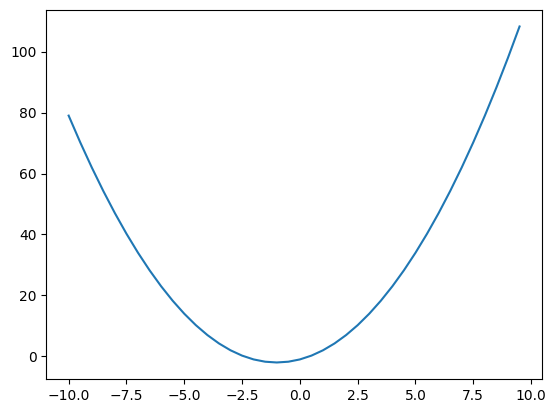

In [7]:
plt.plot(xs,ys)

In [8]:
h = 0.000001
x = -1
slope = (f(x+h) - f(x))/h
slope

1.000088900582341e-06

In [9]:
a = 2.0
b = -3.0
c = 4.0
d = a*b + c
d

-2.0

In [10]:
h = 0.00001
a = 2.0
b = -3.0
c = 4.0
d1 = a*b + c
a += h
d2 = a*b + c
print('d1', d1)
print('d2', d2)
print('Slope', (d2 - d1)/h)

d1 -2.0
d2 -2.0000300000000006
Slope -3.000000000064062


In [31]:
class Value:
    def __init__(self, data, _children= (), _op ='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda : None

    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __neg__(self):
        return self * -1
    
    def __add__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data , (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self,other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out 
    
    def __sub__(self, other):
        return self + (-other)
    
    def __radd__(self, other):
        return self + other
    
    def __rmul__(self, other):
        return self * other
    
    def __rsub__(self, other):
        return other + (-self)
    
    def __truediv__(self, other):
        return self * other**-1
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only integer or float power supported"
        out = Value(self.data**other, (self,), f'**{other}')
        def _backward():
            self.grad += other * self.data**(other-1) * out.grad
        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out =  Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def visit(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    visit(child)
                topo.append(v)
        visit(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
    
    
# a = Value(2.0, label = 'a')
# b = Value(-3.0, label = 'b')
# c = Value(4.0, label = 'c')
# e = a*b; e.label = 'e'
# d = e + c; d.label = 'd'
# f = Value(-2.0, label = 'f')
# L = d*f; L.label = 'L'
# L

In [38]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')

In [73]:
# L.grad = 1.0
# d.grad = -2.0
# f.grad = 3.0
# e.grad = -2.0
# c.grad = -2.0
# b.grad = -4.0
# a.grad = 6.0

In [74]:
# For finding Gradients

# def lol():
#     h = 0.0001
#     a = Value(2.0, label = 'a')
#     b = Value(-3.0, label = 'b')
#     c = Value(4.0, label = 'c')
#     e = a*b; e.label = 'e'
#     d = e + c; d.label = 'd'
#     f = Value(-2.0, label = 'f')
#     L = d*f; L.label = 'L'
#     # L1 = L.data
#     # a = Value(2.0 , label = 'a')
#     # b = Value(-3.0, label = 'b')
#     # c = Value(4.0, label = 'c')
#     # e = a+b; e.label = 'e'
#     # d = e + c ; d.label = 'd'
#     # f = Value(-2.0 + h, label = 'f')
#     # L = d*f; L.label = 'L'
#     # L2 = L.data
#     # print((L2 - L1)/h)
#     print(a,b,c,d,e,f,L)

# lol()

In [42]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='png', graph_attr={'rankdir':'LR'}) # LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{%s | data %.4f | grad %.4f }" % (n.label, n.data,n.grad) , shape = 'record')
        if n._op:
            dot.node(name = uid+ n._op , label= n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

# draw_dot(L)

In [76]:
# lr = 0.01
# a.data += lr * a.grad
# b.data += lr * b.grad
# c.data += lr * c.grad
# f.data += lr * f.grad

# e = a*b
# d = e + c
# L = d*f
# L.data

In [39]:
# Inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(-3.0, label = 'x2')

# Weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias
b = Value(9.88144, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# o = n.tanh()
# ----
e = (2*n).exp()
o = (e-1)/(e+1)
# ----
o.label = 'o'

In [40]:
o.backward()

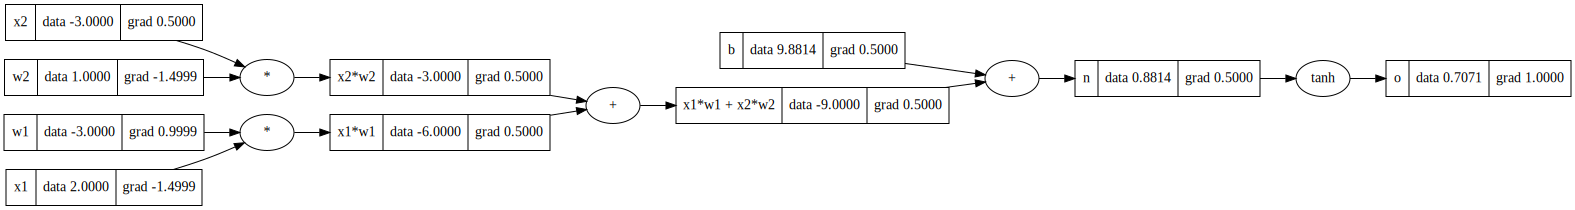

In [43]:
draw_dot(o)

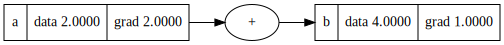

In [81]:
a = Value(2.0, label = 'a')
b = a + a
b.label = 'b'
b.backward()
draw_dot(b)

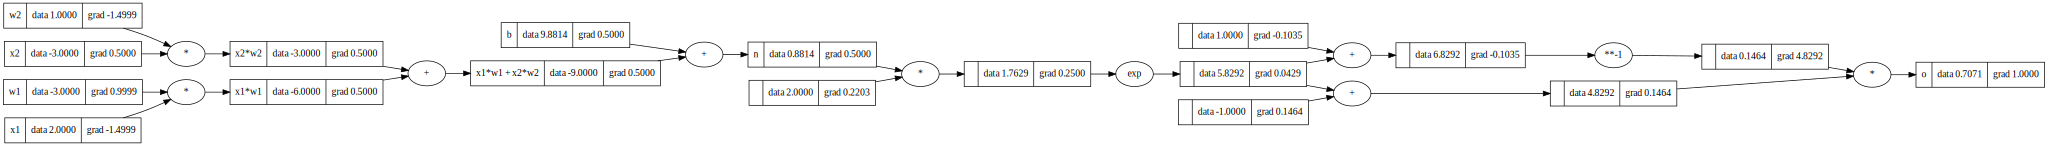

In [44]:
# Inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(-3.0, label = 'x2')

# Weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias
b = Value(9.88144, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
e = (2*n).exp()
o = (e-1)/(e+1)
o.label = 'o'
o.backward()
draw_dot(o)

### Using Pytorch

In [146]:
import torch

x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True

n = x1*w1+x2*w2+b
o = torch.tanh(n)
print(o.data.item())

o.backward()

print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


### Trying to implement a MultiLayer Perceptron

In [147]:
import random

In [148]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    
    def __call__(self, x):
        act = sum((wi*xi for wi, xi in list(zip(self.w , x))), self.b)
        return act.tanh()
    
    def parameters(self):
        return self.w + [self.b]

# x = [2.0, 3.0]
# n = Neuron(2)
# n(x)

In [149]:
class Layer:
    def __init__(self, nin, nout) -> None:
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
# x = [2.0, 3.0]
# l = Layer(2,3)
# l(x)

In [150]:
class MLP:
    def __init__(self, nin, nouts):
        sizes = [nin] + nouts
        self.layers = [Layer(sizes[i], sizes[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for l in self.layers:
            x = l(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
    
x = [2.0, 3.0, -1.0]

In [151]:
# draw_dot(mlp(x))

In [162]:
mlp = MLP(3, [4,4,1])
mlp(x)

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]


In [163]:
n_iter = 1000
lr = 0.05
for k in range(n_iter):
    # Forward pass
    ypred = [mlp(x) for x in xs]    
    loss = sum((ygt - yout)**2 for ygt, yout in zip(ys, ypred))/len(ys)

    # Backward pass
    for p in mlp.parameters():
        p.grad = 0.0
    loss.backward()

    # Update
    for p in mlp.parameters():
        p.data += -lr * p.grad
    
    print(k, loss.data)

0 0.7874034094190472
1 0.5743256003627201
2 0.4446106126582715
3 0.35865745288344325
4 0.2949091735399687
5 0.24581804315449496
6 0.20750718675119864
7 0.17731954308305367
8 0.15329020978867894
9 0.13395327365607887
10 0.1182168369795287
11 0.10526732317793216
12 0.0944962788956628
13 0.0854457401745485
14 0.07776819320970815
15 0.07119751282236349
16 0.0655279318258277
17 0.06059879772896756
18 0.05628347314739039
19 0.05248120064004683
20 0.04911109431217594
21 0.046107665131335955
22 0.04341745964283128
23 0.04099651305650076
24 0.03880840277161384
25 0.03682274825734111
26 0.035014045493479945
27 0.03336075422983214
28 0.03184457782549759
29 0.030449890925202974
30 0.029163281480165337
31 0.027973181850844048
32 0.026869569794662033
33 0.025843724645792245
34 0.024888027362925308
35 0.02399579565864309
36 0.023161147348884206
37 0.022378886530803128
38 0.021644408326938334
39 0.02095361880719733
40 0.020302867379834805
41 0.01968888947447483
42 0.019108757758768025
43 0.01855984046

In [164]:
ypred

[Value(data = 0.9850949011562198),
 Value(data = -0.9782984927596609),
 Value(data = -0.970399791803668),
 Value(data = 0.975157358834463)]